In [12]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

# make pdr available
yf.pdr_override()

In [21]:
# fetch long data
stocks_long = "CROX EB ETSY FTCH PAYS PING PTON ROKU TWLO UPWK"
stocks_long = stocks_long.split()
data_long = pdr.get_data_yahoo(stocks_long, period='1y', interval='1d', group_by="ticker")

# fetch short data
stocks_short = "GME GOOS GSHD LTRPA RCKY TPR WGO ZAGG"
stocks_short = stocks_short.split()
data_short = pdr.get_data_yahoo(stocks_short, period='1y', interval='1d', group_by="ticker")

[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  6 of 6 completed


In [22]:
log_returns = pd.DataFrame()
for stock in stocks_long:
    # calculate daily log returns for longs
    log_returns[stock] = np.log(data_long[stock].Close).diff()
for stock in stocks_short:
    # calculate daily log returns for shorts
    log_returns[stock] = -np.log(data_short[stock].Close).diff()
    
log_returns.head()


,EB,ETSY,FTCH,PAYS,PING,PTON,ROKU,TWLO,UPWK,GME,GSHD,LTRPA,TPR,WGO,ZAGG
Date,,,,,,,,,,,,,,,
2019-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-25,0.004646,0.015805,0.015133,0.034762,0.031072,0.048478,0.019022,0.012700,-0.006725,0.010963,0.011380,-0.041123,-0.028376,-0.017836,-0.022410
2019-10-28,0.041980,-0.023279,0.064226,0.012844,0.017247,-0.042870,0.093718,-0.005436,-0.006770,0.025520,-0.011582,-0.004124,0.012172,-0.010162,0.020994
2019-10-29,0.010500,-0.052102,0.054808,-0.009158,-0.019649,0.077099,0.002448,-0.012293,-0.004084,0.063355,0.023506,0.031351,0.010000,0.066940,-0.032014
2019-10-30,-0.014397,-0.030037,-0.006689,0.010979,0.018469,0.023029,0.014764,0.024437,0.032878,0.013865,-0.032556,-0.023086,-0.014582,-0.024439,0.015183


In [23]:
# create covariance matrix
cov_mat = log_returns.cov()
cov_mat

,EB,ETSY,FTCH,PAYS,PING,PTON,ROKU,TWLO,UPWK,GME,GSHD,LTRPA,TPR,WGO,ZAGG
EB,0.003011,0.000525,0.000728,0.000650,0.000686,6.739125e-05,0.000784,0.000509,0.000411,-9.495345e-04,-0.000799,-0.002823,-0.001292,-0.001202,-0.001721
ETSY,0.000525,0.001808,0.000844,0.000723,0.000585,4.975940e-04,0.000696,0.000698,0.000663,-5.775830e-04,-0.000500,-0.000691,-0.000844,-0.000793,-0.001031
FTCH,0.000728,0.000844,0.002355,0.000806,0.000633,2.487500e-04,0.000730,0.000696,0.000599,-7.630972e-04,-0.000457,-0.001480,-0.000973,-0.000780,-0.001465
PAYS,0.000650,0.000723,0.000806,0.003215,0.000719,3.023205e-05,0.000467,0.000548,0.000526,-7.443835e-04,-0.000440,-0.001263,-0.001165,-0.001166,-0.000902
PING,0.000686,0.000585,0.000633,0.000719,0.001780,4.337448e-04,0.000787,0.000688,0.000395,-5.094223e-04,-0.000551,-0.000959,-0.000589,-0.000877,-0.000750
PTON,0.000067,0.000498,0.000249,0.000030,0.000434,2.103321e-03,0.000417,0.000662,0.000347,-9.373604e-07,-0.000349,-0.000070,0.000192,-0.000108,-0.000466
ROKU,0.000784,0.000696,0.000730,0.000467,0.000787,4.166857e-04,0.002247,0.000941,0.000548,-6.358676e-04,-0.000506,-0.001289,-0.000637,-0.000573,-0.001126
TWLO,0.000509,0.000698,0.000696,0.000548,0.000688,6.615682e-04,0.000941,0.001645,0.000548,-2.655036e-04,-0.000556,-0.000846,-0.000466,-0.000700,-0.000943
UPWK,0.000411,0.000663,0.000599,0.000526,0.000395,3.473265e-04,0.000548,0.000548,0.001881,-6.352185e-04,-0.000290,-0.001353,-0.000157,-0.000800,-0.000838
GME,-0.000950,-0.000578,-0.000763,-0.000744,-0.000509,-9.373604e-07,-0.000636,-0.000266,-0.000635,4.517141e-03,0.000503,0.001567,0.001157,0.000684,0.001412


In [24]:
# Simulating n portfolios
num_port = 1000000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(log_returns.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [25]:
for i in range(num_port):
  wts = np.random.uniform(size = len(log_returns.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_returns.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

In [26]:
names = log_returns.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.1152772  0.09273839 0.05518065 0.08596891 0.08441686 0.03401319
 0.04173685 0.03003867 0.0597962  0.0489696  0.09613798 0.03479593
 0.08696547 0.11047342 0.02349068]
[0.01956161 0.15288717 0.21260479 0.01270966 0.07756688 0.16865495
 0.00276229 0.0439725  0.00408579 0.01766312 0.00199777 0.04968006
 0.00871769 0.05374583 0.17338988]


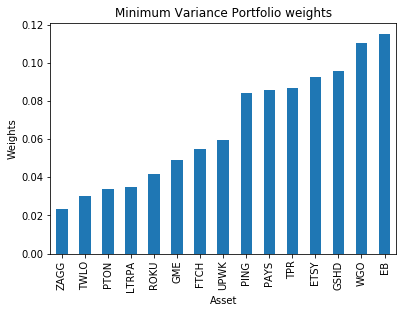

In [27]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

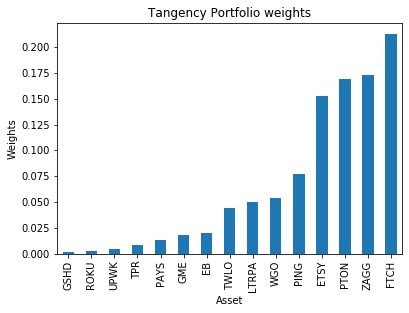

In [28]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();

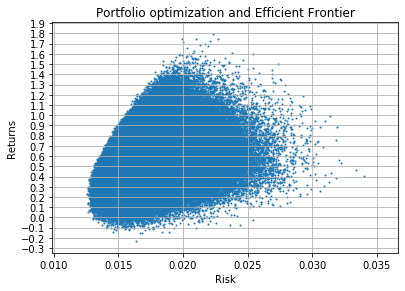

In [44]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
ax1.grid()
plt.yticks(np.arange(-0.5, 5, step=0.1))
plt.xticks(np.arange(0, 0.035, step=0.005))
plt.scatter(port_risk, port_returns, 1)
plt.show();

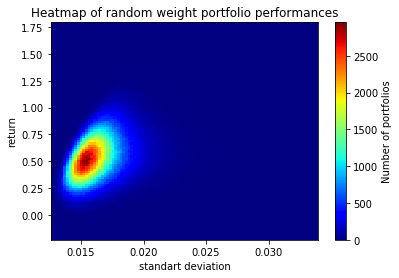

In [64]:
N_bins = 100

# Construct 2D histogram from data using the 'plasma' colormap
# cmap='Reds', cmap='plasma'
plt.hist2d(port_risk, port_returns, bins=N_bins, cmap='jet')


# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of portfolios')

# Add title and labels to plot.
plt.title('Heatmap of random weight portfolio performances')
plt.xlabel('standart deviation')
plt.ylabel('return')

# Show the plot.
plt.show()